In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from datetime import datetime
import os

In [2]:
path_to_messages_folder = os.path.join(os.path.dirname(os.getcwd()), 'data', 'messages_for_qualitative_analysis')
path_to_messages_folder

'/home/dharakyu/language-and-demonstrations/data/messages_for_qualitative_analysis'

## Language condition

In [3]:
lang_train_path = os.path.join(path_to_messages_folder, 
                               'perfect-teacher_lang_max-message-len=12_train-percent=0.05_log_train.pkl')
lang_val_path = os.path.join(path_to_messages_folder, 
                               'perfect-teacher_lang_max-message-len=12_train-percent=0.05_log_val.pkl')

lang_train = pd.read_pickle(lang_train_path)
lang_val = pd.read_pickle(lang_val_path)

lang_train_messages = [str(message) for message in lang_train['signal']]
lang_val_messages = [str(message) for message in lang_val['signal']]

In [4]:
# number of unique train messages
len(set(lang_train_messages))

2

In [5]:
# number of unique val messages
len(set(lang_val_messages))

2

In [6]:
# number of unique val messages not seen during training
len(set(lang_val_messages) - set(lang_train_messages))

0

## Demonstrations condition

In [7]:
demo_train_path = os.path.join(path_to_messages_folder, 
                               'perfect-teacher_pedagogical-demos_k=2_train-percent=0.05_log_train.pkl')
demo_val_path = os.path.join(path_to_messages_folder, 
                               'perfect-teacher_pedagogical-demos_k=2_train-percent=0.05_log_val.pkl')

demo_train = pd.read_pickle(demo_train_path)
demo_val = pd.read_pickle(demo_val_path)

demo_train_demos = [str(message) for message in demo_train['signal']]
demo_val_demos = [str(message) for message in demo_val['signal']]

In [8]:
# number of unique train demos
len(set(demo_train_demos))

40

In [9]:
# number of unique val demos
len(set(demo_val_demos))

69

In [10]:
# number of unique val demos not seen during training
len(set(demo_val_demos) - set(demo_train_demos))

52

## Figure

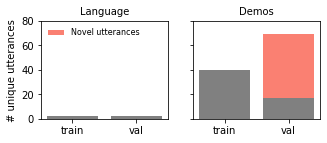

In [12]:
lang_bottom_bar = [2, 2-0]
lang_top_bar = [0, 0]

demos_bottom_bar = [40, 69-52]
demos_top_bar = [0, 52]

labels = ['train', 'val']

fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(5, 1.8), sharey=True)

# plot the bars
ax0.bar(labels, lang_bottom_bar, color='gray')
ax0.bar(labels, lang_top_bar, bottom=lang_bottom_bar, color='salmon', label="Novel utterances")

# add legends, title and axis labels
ax0.legend(loc='upper left', fontsize=8, frameon=False)
ax0.set_title("Language", fontdict={'fontsize': 10})
ax0.set_ylabel("# unique utterances")

ax1.bar(labels, demos_bottom_bar, color='gray')
ax1.bar(labels, demos_top_bar, bottom=demos_bottom_bar, color='salmon', label="Novel utterances")

ax1.set_title("Demos", fontdict={'fontsize': 10})
ax1.set_ylim([0, 80])

fig.show()